### Using GNU Octave to numerically find a solution for a system of harmonic oscillators

#### Description

I talk about how I use GNU Octave to find approximate solutions to systems of differential equations by using numerical techniques.

Links to elsewhere
- Deriving the second order DE of a single pendulum: Physics with Elliot, https://www.youtube.com/watch?v=0q0L7Fj4dk8
- Choosing an ODE solver: Matlab documentation, https://au.mathworks.com/help/matlab/math/choose-an-ode-solver.html
- Setting up Gnu Octave to run with Jupyter Notebook, https://www.jason-thomas.xyz/post?postNum=20
- The video script, code to find solutions, and all files used to make the video, 
- Video sample of metronomes in-phase sync, 

#### Script

In this video I'd like to tell you about how I use GNU Octave to find approximate solutions to systems of differential equations by using numerical methods.

VIDEO CLIP

First though, check out this contraption I made in the shed. 
 
I hope you can anticipate that me moving this one pendulum won't affect the others in any noticable way.

But what happens if I sit the whole wooden thing on some rollers? This is now a system of pendulums.

You might have seen videos where a series of metronomes are set on a plank and then one cans and they end up being synchronised.

This wooden thing is also a series of harmonic oscillators like the metronomes. The difference is that metronomes are forced harmonic oscillators. Them being forced just means that they are wound up by spring or sometimes they have batteries internally. A pendulum on a wind up clock is also a forced oscillator, because the clock forces it. However, these simple pendula on this wooden platform are unforced oscillators. Let's see what happens when I let one go.

VIDEO CLIP

They become synchronised, but they are not in-phase like the metronomes. These are in anti-phase synchronisation. It seems that this system has a stable state where the platform doesn't move.

Let's now introduce a differential equation to understand what's going on. Let's think about just one pendulum to begin with and then we can expand on that later.

$ \frac{d \theta}{dt} + \frac{g}{l} sin \theta = 0 $

This is a second order homogenous differential equation that governs the movement of a simple harmonic oscillator.

Deriving that equation isn't the focus of this video but if you would like to see how to derive it, then consider watching a video on the channel "Physics with Elliot" that talks about how to do that. I found it helpful. The link is in the description.

Note that in that video an analytic solution is found for the small angle approximation $ \sin \theta \approx \theta $. We won't bother with that since we're using a numerical technique to find an approximate solution. The approximation we find should be sufficient to understand the system's behaviour.

Before we can use this in Gnu Octave we should rearrange this second order equation to be a system of two first order equations. By using a change of variables we should be able to do this for any second order differential equation.

$ x_1 = \theta $

$ x_1' = \theta' = x_2 $

$ x_2' = \theta'' $

So, let's substitute these new variables into the equation

$ x_2' + \frac{g}{l} sin x_1 = 0 $

And so we have this system of equations:

$ x_1' = x_2 $

$ x_2' = -\frac{g}{l} sin x_1 $

So far the system of equations represent a simple harmonic oscillator; simple here means the oscillator has no friction acting upon it. Simple harmonic oscillators can be modified to include friction and other sources of dampening. Here, $ k $ is a friction parameter.

$ x_1' = x_2 $

$ x_2' = -\frac{g}{l} sin x_1 - k x_2 $

Then given some initial conditions for $ x_1, x_2 $, we can get the Octave function ODE45 to approximate the solution. As far as I can tell the function in Matlab and Octave behaves the same. It is a Runge Kutta method, and I think the most basic example of these is Euler's Method.

Before you can use ODE45 in Octave, you should install the ocl package via forge.

The first step is to define a function that is the system of differential equations so that Octave can use it.

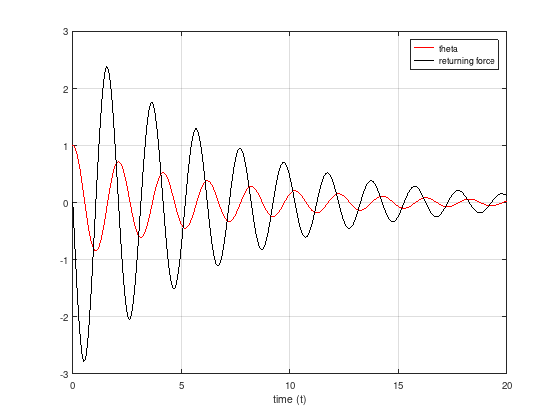

In [12]:
clear;

function dx = dynamics_pendulum(t,x)
    k = 0.3;
    l=1; 
    g=9.81;
    dx=[x(2);
        -(g/l)*sin(x(1))-k*x(2)];
end

time_step=0.05;
t0=[0:time_step:20];
x0=[1; 0];

[t,solution]=ode45(@dynamics_pendulum,t0,x0);
x1=solution(:,1);
x2=solution(:,2);

plot(t,x1,'r');
grid;
hold on;
plot(t,x2,'k');
legend("theta", "returning force")
xlabel("time (t)");
hold off;

Let's take a look at the function dynamics_pendulum. It's convenient to define these parameters locally, like k for friction, l for the pendulum arm length and g for the gravitational constant.

Note that here the value of friction, $ k $, was arbitrarily chosen but I give an explanation for this at the end of the video.

We must define the independent variable. Like in almost any model of a physical system, we take time to be the independent variable.

x0 is the initial condition vector. You then pass the function of equations, independent variable and initial conditions to the ODE45 method. 

The ODE45 method iterates over the points in the independent variable and passes those, and the approximated point for each equation, to your function of equations. Those are substituted into the equations and the equations with those substitutions are then returned to ODE45. ODE45 will then know how to approximate the next values for the equations, in a similar way to Euler's Method. 

There are other solvers but the Matlab documentation says that ODE45 is usually the one you want to use. A link to the documentation on how to choose a solver is in the notes.

Then we graph the result, and look what we get. These are approximated values for x_1, or theta, and for x_2, or the returning force, at every point of t.

PIC OF GRAPH AND VIDEO OF ONE PENDULUM

---

So far, so good. But that was just one pendulum isolated from the others. Let's now sit a system of two pendula, on a shared platform, on some rollers to see what happens.

VIDEO

What's happening here is the dominant pendulum forces the platform very slightly, but the pendulum at rest has inertia. By the time the formerly steady pendulum catches up to its rest position the platform is already heading in the opposite direction. This continues until the pendula are in anti-phase synchronisation, which means the platform will no longer move.

Recall that the former equation determined the angle of the single pendulum. We can use that again but we can make a change to say that each pendulum dampens every other pendulum.

Let's define a "nudge" parameter for each pendulum to achieve that dampening effect on other pendula. For a pendulum to nudge another pendulum causes it to lose energy, so a pendulum's total loss of energy is that nudge plus friction. 


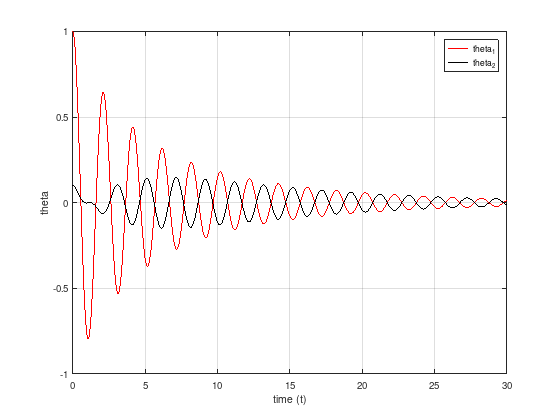

In [8]:
clear;

function dx = dynamics_pendulum(t,x)
    k = 0.2;
    n = 0.2;
    l=1; 
    g=9.81;
    dx(1) = x(2); 
    dx(2) = -(g/l)*sin(x(1)) -(k+n)*x(2) -n*x(4);
    dx(3) = x(4);
    dx(4) = -(g/l)*sin(x(3)) -(k+n)*x(4) -n*x(2);
end

time_step=0.05;
t0=[0:time_step:30];
x0=[1; 0; 0.1; 0];
[t,solution]=ode45(@dynamics_pendulum,t0,x0);
x1=solution(:,1);
x3=solution(:,3);

plot(t,x1,'r');
grid;
hold on;
plot(t,x3,'k');
legend("theta_1", "theta_2")
xlabel("time (t)");
ylabel("theta");
hold off;

This chart shows a system of two equations, which represent the two pendula, and this shows the pendula do end up with anti-phase synchronisation.

PIC OF GRAPH WITH VIDEO

---

Now for the initial problem, the platform of three equations.

VIDEO

This is essentially the same as the system of two equations but there's a slight difference. The force that each pendulum gives to the platform is absorbed by every other pendulum. The force that a pendulum gains from the system is the average of the force exerted by the other two pendula.

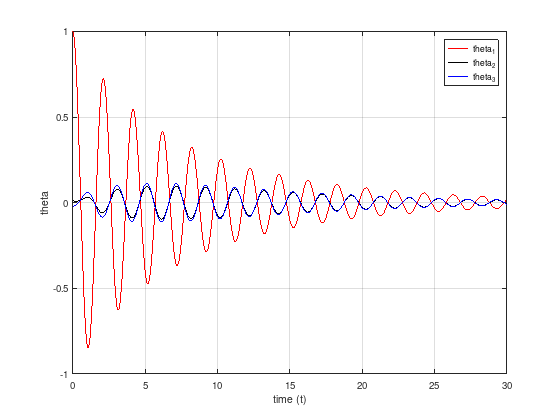

In [14]:
clear;

function dx = dynamics_pendulum(t,x)
    k = 0.1;
    n = 0.2;
    l=1;
    g=9.81;
    dx(1) = x(2); 
    dx(2) = -(g/l)*sin(x(1)) -(k+n)*x(2) -n*(x(4) + x(6))/2; 
    dx(3) = x(4);
    dx(4) = -(g/l)*sin(x(3)) -(k+n)*x(4) -n*(x(2) + x(6))/2;
    dx(5) = x(6);
    dx(6) = -(g/l)*sin(x(5)) -(k+n)*x(6) -n*(x(2) + x(4))/2;
end

time_step=0.05;
t0=[0:time_step:30];
x0=[1; 0; 0.01; 0; -0.02; 0];

[t,solution]=ode45(@dynamics_pendulum,t0,x0);
x1=solution(:,1);
x3=solution(:,3);
x5=solution(:,5);

plot(t,x1,'r');
grid;
hold on;
plot(t,x3,'k');
plot(t,x5,'b');
legend("theta_1", "theta_2", "theta_3")
xlabel("time (t)");
ylabel("theta");
hold off;

And the chart for this one shows that each of the pendula that were initially at rest will each move to counteract half of the force that the dominant pendulum exerts on the system.

CHART AND VIDEO

I should note that I plucked the parameters $ k, n $ out of the air. Since we have a physical system we can play around with, which is this wood thing on rollers I made, then we could measure the actual angles of the pendula at every point and then use those data points to solve for the unknown parameters. I imagine it would involve filming the pendula and then measuring the angle theta at regular intervals. I don't have the time for this step and it's not really the point of the video, but it's possible.

It has been fun to build the wooden thing and fun also to talk about using Octave to do this, so I hope you find it useful.

If you check the description you will find links covering:
- how to derive the differential equation of a pendulum
- how to setup Jupyter Notebook to run using Octave
- documentation about how to choose a numerical method
- the script and code to find these solutions
- how to install the OCL package so that you can use ODE solvers in Gnu Octave

Please leave a comment to share what you found interesting or suprising, or if you have any feedback.

Thanks for watching.